***
# TD 3 - Algorithmique Avancée 1
***

***
## Exercice 1
***

1. Quels sont les autres noms donnés pour le tri par comptage ?

**Réponse:**

Le tri par dénombrement, le tri casier

2. Quelle est la condition à satisfaire sur les données pour pouvoir appliquer le tri par comptage ?

**Réponse:**

Les données doivent être des nombres entiers

3. Qu’est qu’un histogramme ?

**Réponse:**

En statistique, un histogramme est une représentation graphique permettant de représenter la répartition d'une variable continue en la représentant avec des colonnes verticales.

<img src=" 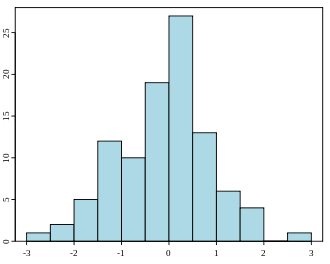" width="140">

4. Ce tri est très efficace dans un cas précis. Quel est ce cas ?

**Réponse:**

Le tri sera d’autant plus efficace que l’intervalle sera réduit et que le nombre de valeurs à classer sera élevé. En gros, Soit _n_ la taille de la liste à trier et _m_ la longueur de l'intervalle entre la plus petite valeur et la plus grande. 

Plus le rapport _n/m_ est grand, plus le tri est avantageux. En effet, si _n_ est très grand, aucun tri ne pourra rivaliser en vitesse de classement avec le tri casier. Si _m_ est très petit, l’efficacité sera encore plus grande puisque l’espace mémoire nécessaire sera moins important. L’idéal serait également qu’il n’y ait pas trop de trous dans l’ensemble, c’est à dire que la plupart des valeurs de l’intervalle se retrouvent dans l’ensemble à trier. 

En effet, même si une valeur n’apparaît pas, elle requiert une case dans le tableau intermédiaire, ce qui correspond à de l’allocation mémoire inutile.

5. Expliquer les différentes étapes de ce tri

**Réponse:**

Soit $E$ l'ensemble de données à trier :

1. La première étape est de créer notre tableau des effectifs E c'est-à-dire l'histogramme des valeurs de E.


2. La deuxième est de le parcourir et de recopier dans le tableau trié les valeurs autant de fois qu'elles apparaissent et dans l'ordre croissant.

6. Dérouler l’algorithme du tri par comptage manuellement sur la liste
L=[4,7,2,8,2,5,4,2,1,2,7,3,5,1,4], en précisant les valeurs de l’histogramme et les valeurs de la liste triée.

**Réponse:**

Avec plaisir, déroulons le tri par dénombrement sur la liste L=[4,7,2,8,2,5,4,2,1,2,7,3,5,1,4]

#### 1. histogramme des valeurs

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| 0 | 2 | 4 | 1 | 3 | 2 | 0 | 2 | 1 |

#### 2. Parcours de l'histogramme et écriture des valeurs

| i |hist[i] | Action                  |   tableau trié  |
|---|--------|-------------------------|-----------------|
| 0 |    0   | On ne fait rien         |                 |
| 1 |    2   | On ajoute deux fois 1   |11               |  
| 2 |    4   | On ajoute quatre fois 2 |112222           |  
| 3 |    1   | On ajoute une fois 3    |1122223          | 
| 4 |    3   | On ajoute trois fois 4  |1122223444       |  
| 5 |    2   | On ajoute deux fois 5   |112222344455     |   
| 6 |    0   | On ne fait rien         |112222344455     |   
| 7 |    2   | On ajoute deux fois 7   |11222234445577   |
| 8 |    1   | On ajoute une fois 8    |112222344455778  |

7. Ecrire une fonction comptage, d’arguments L et N, renvoyant une liste P de longueur N dont l’élément d’indice k désigne le nombre d’occurrences de l’entier k dans la liste L. Expliquer à quoi correspond N par rapport à L.

In [1]:
def comptage(L, N):
    """renvoie une liste du nombre d'occurrences dans L des éléments allant
    de 0 à N-1. N est censé être la longueur du tableau L"""
    P = [0]*N
    for k in L:
        P[k] += 1
    return P

8. Utiliser la liste P pour déduire une fonction triComptage, d’arguments L et N, renvoyant une liste M triée dans l’ordre croissant.

In [3]:
def tri_comptage(L,N):
    """trie la liste L, dont les éléments sont inférieurs ou égaux à N-1, en utilisant
    la liste des occurrences données par la fonction comptage"""
    M = []
    P = comptage(L,N)
    for k in range(N):
        for i in range(P[k]):
            M.append(k)
    return M

9. Tester la fonction triComptage sur une liste de 20 entiers inférieurs ou égaux à 5, choisis aléatoirement.

In [7]:
import random
liste = []
for i in range(20):
    liste.append(random.randint(0,5))
print(liste)

print(tri_comptage(liste,6))

[0, 3, 1, 0, 0, 3, 0, 0, 5, 5, 3, 3, 4, 0, 2, 5, 0, 1, 5, 2]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5]


10. Quelle est la complexité de cet algorithme ?

**Réponse:**

La fonction comptage initialise un tableau de N valeurs à 0, ce qui donne 0(N). Ensuite elle utilise une boucle for sur la longeur du tableau de longueur _n_ ce qui nous donne une complexité en Θ(n). 

La fonction tri comptage se sert de la fonction comptage (voir ligne 5) et hérite donc de sa complexité en Θ(n), ensuite elle fait une double boucle. La boucle externe s'exécutera N fois Θ(N), tandis que la boucle interne ne s'exécutera qu'un nombre déterminé de fois à chaque tour qui ne dépend ni de _n_, ni de _N_ mais des différentes valeurs prises par les P[k]. On note donc une complexité Θ(1) pour la boucle interne.

En tout on a donc une complexité de Θ(N)* Θ(1) = Θ(N) pour tout le bloc de la boucle imbriquée.

En tenant compte de l'ensemble du programme tri comptage on a donc une complexité de Θ(n) (ligne 6) suivie d'une complexité de Θ(N) (lignes 6 à 8) ce qui nous donne une complexité en :

$$
\theta(n) + \theta(N) = \theta(N+n)
$$

La complexité du tri comptage est donc en temps linéaire

***
## Exercice 2
***

1. Quel est le coût de l’algorithme suivant ?
<pre>
def test_de_presence (L) :
    if 2 in L :
        print ( " Il y est " )
    else :
        print(" Il n’y est pas ")
</pre>

**Réponse:**

Au pire des cas on parcourt toute la liste. Sa longueur est de len(L)
On est donc en O(len(L)). Si on suppose que n = len(L) comme c'est usuellement le
cas, la complexité est linéaire => $O(n)$

2. Quel est le coût de l’algorithme suivant ?
<pre>
def test_de_presence (a, L) :
    if a == 0:
        print ( "a doit être non nul " )
    else :
        L . remove ( a )
</pre>

**Réponse:**

Si on tombe sur une valeur nulle, l'algo se termine en une seule étape en O(1) c'est le
meilleur des cas. Au pire des cas la valeur n'est pas nulle, il faut donc parcourir l'ensemble
du tableau pour la retrouver et la supprimer. Comme c'est le pire des cas on suppose que cette
valeur est en fin de tableau. La complexité est donc linéaire.
Ps: La réponse est similaire si la valeur qu'on veut supprimer est en début de tableau car 
supprimer une valeur implique de décaler toutes les valeurs qui suivent ce qui peut impliquer
un nombre significatif de valeurs du tableau (pratiquement toutes si on est au début). On voit
donc que la linéarité est inévitable : $O(n)$ [en supposant que n=len(L)]

3. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (11) :
        print(i∗n)
</pre>

**Réponse:**

En supposant que n est une valeur connue de python (sinon ça ferait une erreur) le programme
effectue 11 opérations. C'est une valeur constante dont la valeur est raisonnnablement
petite, on peut donc noter O(1).

4. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (n) :
        print(i∗i)
</pre>

**Réponse**:

Cette fois on multiplie deux valeurs dans une boucle qui va de 0 à n-1. Cette boucle s'effectuera

exactement n fois. La complexité est donc en $Θ(n)$

5. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (n) :
        for j in range (n) :
                print(i∗j)
</pre>

**Réponse:**

Le print étant une opération constante comprise dans une boucle de 0 à n-1 elle même comprise
dans une boucle de 0 à n-1 on a donc une complexité en $Θ(n)*Θ(n) = Θ(n²)$ 

[Méthode des "O Θ"]

6. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (n) :
        for j in range (i) :
                print(i∗j)
</pre>

**Réponse:**

Pour calculer la complexité ici, il faut faire appel aux sommes arithmétiques:

    somme de (i=0 à n-1) de somme de (j=0 à i-1) de 1        (nombre de termes fois constante)
    
    = somme de (i=0 à n-1) de i         ((nombre de termes)*(premier terme+dernier terme)/2)
    
    = n*(n-1)/2 soit des opérations de l'ordre de n² opérations on dit Θ(n²)

7. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (5, n - 4) :
        for j in range (i - 5, i + 6) :
                print(x+2)
</pre>

**Réponse:**

Une fois de plus on applique la technique des sommes arithmétiques (on suppose x connu):

    somme de (i=5 à n-3) de somme de (j=i-5 à i+5) de 1
    
    = somme de (i=5  à n-3) de 11
    
    = 11*(n-7) soit une complexité en Θ(n)

8. Quel est le coût de l’algorithme suivant ?
<pre>
for i in range (1, n+1) :
        for j in range (1, i+1):
                for k in range (1, j+1):
                        sudripyth(x)
</pre>

**Réponse**:

On applique encore la technique des sommes arithmétiques "jusqu'à un certain point" :
    On suppose que sudripyth est une fonction connue aux opérations négligeables
    
    somme de (i=1 à n) de somme de (j=1 à i) de somme de (k=1 à j) de 1
    
    = somme de (i=1 à n) de somme de (j=1 à i) de j
    
    = somme de (i=1 à n) de i*(i+1)/2
    
    = somme de (i=1 à n) de (i² + i)/2
    
    = 1/2*(somme de (i=1 à n) (i²+i))
    
    = 1/2*(somme de (i=1 à n) de i² + somme de (i=1 à n) de i)
    
    = 1/2( ( n*(n+1)*(2*n+1) )/6 + n*(n+1)/2 )
    
    En terme de complexité asymptotique on a 1/2*(Θ(n^3) + Θ(n^2))
    = Θ(n^3) + Θ(n^2)
    = Θ(n^3)

***
## Exercice 3
***

Classer les fonctions suivantes par ordre croissant de leur valeur asymptotique :

$log(n$<sup>$3$</sup>) , $2$<sup>$n$<sup>$2$</sup></sup> , $n$<sup>$3$</sup>$log(n)$, $\sqrt{n!}$ , $2\sqrt{n}$

1. $log(n^{3})$

2. $2\sqrt{n}$

3. $n^{3}log(n)$

4. $\sqrt{n!}$

5. $2^{n^{2}}$